In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install xarray rioxarray geopandas rasterio netcdf4 h5netcdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 153.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 101.8 MB/s eta 0:00:00


In [3]:
# --- NEW CELL 3 (Robust Copy & Verify) ---
import os

# Install rsync for a more robust copy
print("Installing rsync...")
!apt-get install rsync -y > /dev/null

# Define paths
GDRIVE_PROJECT_PATH = "/content/drive/My Drive/Bangladesh_Flood_Project/data/processed"
COLAB_PROJECT_PATH = "/content/data/processed"

GDRIVE_DATA_FILE = f"{GDRIVE_PROJECT_PATH}/final_model_data.nc"
COLAB_DATA_FILE = f"{COLAB_PROJECT_PATH}/final_model_data.nc"

# Create the local directory
!mkdir -p "{COLAB_PROJECT_PATH}"

# --- 1. Force a new copy using rsync ---
print(f"Forcing a fresh copy of the 14GB file from Drive...")
# Delete the old, potentially corrupt file on Colab
!rm -f "{COLAB_DATA_FILE}"
# Use rsync with a progress bar
!rsync -ah --progress "{GDRIVE_DATA_FILE}" "{COLAB_DATA_FILE}"
print("Dataset copy complete!")


# --- 2. Verify the file integrity ---
print("\n--- Verifying file integrity (this will take a few minutes) ---")
print("Calculating checksum on Google Drive file...")
!md5sum "{GDRIVE_DATA_FILE}"

print("\nCalculating checksum on Colab Disk file...")
!md5sum "{COLAB_DATA_FILE}"

print("\n--- Verification Complete ---")
print("Please COMPARE the two long strings above (the 'checksums').")
print("If they are IDENTICAL, the copy was successful.")
print("If they are DIFFERENT, the file on your Google Drive is corrupt.")


# --- 3. Copy other files (scalers, model, etc.) ---
# (This is the same as before, to support resuming)
GDRIVE_SCALER_FILE = f"{GDRIVE_PROJECT_PATH}/data_scalers.joblib"
COLAB_SCALER_FILE = f"{COLAB_PROJECT_PATH}/data_scalers.joblib"
if os.path.exists(GDRIVE_SCALER_FILE) and not os.path.exists(COLAB_SCALER_FILE):
    !cp "{GDRIVE_SCALER_FILE}" "{COLAB_SCALER_FILE}"

GDRIVE_MODEL_FILE = f"{GDRIVE_PROJECT_PATH}/flood_convlstm_model.keras"
COLAB_MODEL_FILE = f"{COLAB_PROJECT_PATH}/flood_convlstm_model.keras"
if os.path.exists(GDRIVE_MODEL_FILE) and not os.path.exists(COLAB_MODEL_FILE):
    !cp "{GDRIVE_MODEL_FILE}" "{COLAB_MODEL_FILE}"

GDRIVE_HISTORY_FILE = f"{GDRIVE_PROJECT_PATH}/training_history.json"
COLAB_HISTORY_FILE = f"{COLAB_PROJECT_PATH}/training_history.json"
if os.path.exists(GDRIVE_HISTORY_FILE) and not os.path.exists(COLAB_HISTORY_FILE):
    !cp "{GDRIVE_HISTORY_FILE}" "{COLAB_HISTORY_FILE}"

print("All other files synced.")

Installing rsync...
Forcing a fresh copy of the 14GB file from Drive...
sending incremental file list
final_model_data.nc
         14.25G 100%   43.38MB/s    0:05:13 (xfr#1, to-chk=0/1)
Dataset copy complete!

--- Verifying file integrity (this will take a few minutes) ---
Calculating checksum on Google Drive file...
59e27c2da2c8c1e738fc24f4a3b7de8d  /content/drive/My Drive/Bangladesh_Flood_Project/data/processed/final_model_data.nc

Calculating checksum on Colab Disk file...
59e27c2da2c8c1e738fc24f4a3b7de8d  /content/data/processed/final_model_data.nc

--- Verification Complete ---
Please COMPARE the two long strings above (the 'checksums').
If they are IDENTICAL, the copy was successful.
If they are DIFFERENT, the file on your Google Drive is corrupt.
All other files synced.


In [4]:
import json

# Define the *new* paths for the Colab environment
colab_config = {
  "project_name": "Bangladesh_Flood_Prediction_Colab",
  "data_paths": {
    "raw": "/content/drive/My Drive/Bangladesh_Flood_Project/data/raw/",
    "processed": "/content/data/processed/" # Use the FAST local disk
  },
  "output_paths": {
    "reference_grid": "/content/data/processed/reference_grid.tif",
    "static_features": "/content/data/processed/static_features.nc",
    "dynamic_features": "/content/data/processed/dynamic_features.nc",
    "target_variable": "/content/data/processed/target_variable.nc",
    "final_dataset": "/content/data/processed/final_model_data.nc"
  },
  "processing_params": {
    "time_start": "2020-01-01",
    "time_end": "2023-12-31",
    "time_freq": "D",
    "target_crs": "EPSG:32645",
    "target_resolution": 1000
  }
}

# Overwrite the config.json you uploaded with these new paths
with open('config.json', 'w') as f:
    json.dump(colab_config, f, indent=2)

print("config.json has been updated for Colab.")

config.json has been updated for Colab.


In [5]:
# 1. Check the file size and permissions
!ls -lh /content/data/processed/final_model_data.nc

# 2. Check the available disk space
!df -h

-rw------- 1 root root 14G Nov  2 19:22 /content/data/processed/final_model_data.nc
Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   53G   60G  47% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  750M  62% /usr/sbin/docker-init
tmpfs           6.4G  388K  6.4G   1% /var/colab
/dev/sda1       119G   69G   51G  58% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           113G   56G   57G  50% /content/drive


In [12]:
# This will automatically resume if it finds a checkpoint
!python train_model.py --reset
# !python train_model.py --reset for training the whole thing again

2025-11-09 10:55:45.479109: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762685745.502746    9918 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762685745.512063    9918 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762685745.536079    9918 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762685745.536115    9918 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762685745.536119    9918 computation_placer.cc:177] computation placer alr

In [13]:
# Define paths
GDRIVE_PROJECT_PATH = "/content/drive/My Drive/Bangladesh_Flood_Project/data/processed"
COLAB_PROJECT_PATH = "/content/data/processed"

# Model file
COLAB_MODEL_FILE = f"{COLAB_PROJECT_PATH}/flood_convlstm_model.keras"
GDRIVE_MODEL_FILE = f"{GDRIVE_PROJECT_PATH}/flood_convlstm_model.keras"

# History file
COLAB_HISTORY_FILE = f"{COLAB_PROJECT_PATH}/training_history.json"
GDRIVE_HISTORY_FILE = f"{GDRIVE_PROJECT_PATH}/training_history.json"

print("Copying latest model checkpoint back to Google Drive...")
!cp "{COLAB_MODEL_FILE}" "{GDRIVE_MODEL_FILE}"

print("Copying latest history file back to Google Drive...")
!cp "{COLAB_HISTORY_FILE}" "{GDRIVE_HISTORY_FILE}"

print("Backup complete!")

Copying latest model checkpoint back to Google Drive...
Copying latest history file back to Google Drive...
Backup complete!


Successfully loaded history from /content/data/processed/training_history.json


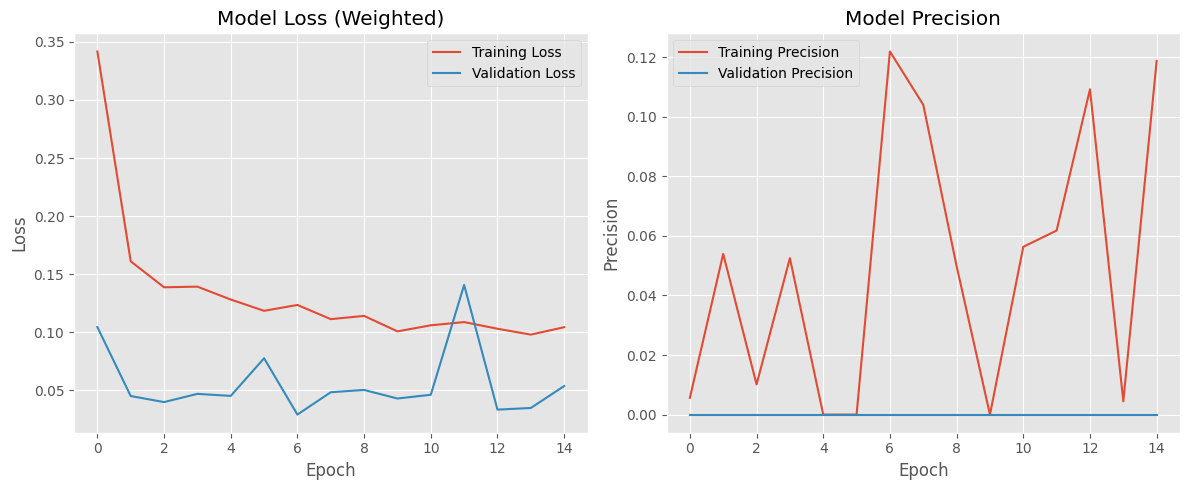

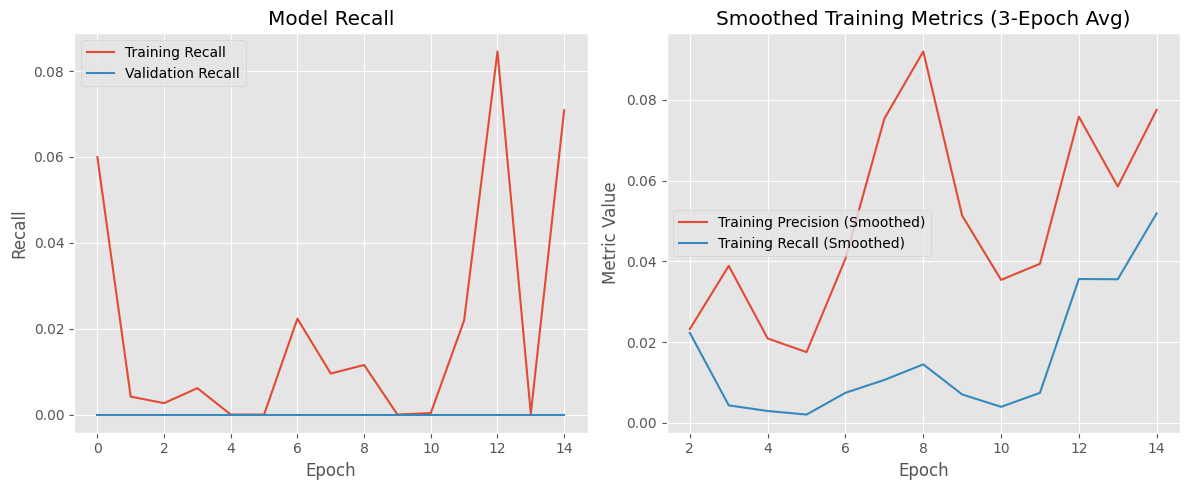

In [14]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import os

# --- Configuration ---
processed_path = '/content/data/processed'
history_path = os.path.join(processed_path, 'training_history.json')

# --- Load the History ---
try:
    with open(history_path, 'r') as f:
        history_data = json.load(f)
    print(f"Successfully loaded history from {history_path}")

    # Convert to a Pandas DataFrame for easier handling
    df = pd.DataFrame(history_data)

    # --- Create Plots ---
    plt.style.use('ggplot')

    # 1. Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(df['loss'], label='Training Loss')
    plt.plot(df['val_loss'], label='Validation Loss')
    plt.title('Model Loss (Weighted)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # 2. Plot Precision
    plt.subplot(1, 2, 2)
    plt.plot(df['prec'], label='Training Precision')
    plt.plot(df['val_prec'], label='Validation Precision')
    plt.title('Model Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # 3. Plot Recall (Most Important!)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(df['rec'], label='Training Recall')
    plt.plot(df['val_rec'], label='Validation Recall')
    plt.title('Model Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.grid(True)

    # 4. Plot Smoothed Metrics (to see the real trend)
    # We smooth the "bumpy" training metrics with a rolling average
    plt.subplot(1, 2, 2)
    plt.plot(df['prec'].rolling(window=3).mean(), label='Training Precision (Smoothed)')
    plt.plot(df['rec'].rolling(window=3).mean(), label='Training Recall (Smoothed)')
    plt.title('Smoothed Training Metrics (3-Epoch Avg)')
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"ERROR: Could not find history file at {history_path}")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
!python3 /content/evaluate_model.py

2025-11-09 11:52:17.151221: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762689137.175149   24465 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762689137.183473   24465 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762689137.207126   24465 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762689137.207151   24465 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762689137.207155   24465 computation_placer.cc:177] computation placer alr